# Rolling Means and Out Of Fold (OOF) Rolling Means

An interesting idea (inspired by [this](https://www.kaggle.com/c/bosch-production-line-performance/forums/t/25359/3-place-solution?forumMessageId=144485#post144485)) which allows you to calculate a rolling mean for your data without overfitting to the data.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
# I copied these from the linked post so the results would be identical.
VALUES = '0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0'

In [156]:
vec = np.array(VALUES.split()).astype(np.int)
vec

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [169]:
rm = pd.DataFrame(vec).rolling(5, center=True).mean().values.ravel()
rm

array([ nan,  nan,  0.2,  0.2,  0.4,  0.6,  0.6,  0.4,  0.4,  0.2,  0. ,
        0. ,  0.2,  0.2,  0.2,  0.4,  0.4,  0.2,  0.2,  0.4,  0.2,  0.2,
        0.2,  0.2,  0. ,  0.2,  0.2,  0.2,  0.2,  0.2,  0. ,  0.2,  0.2,
        0.4,  0.4,  0.4,  0.4,  0.4,  nan,  nan])

In [148]:
# Again copied from the linked post so the results would be identical.
INDICIES = '1 1 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2'

In [158]:
idx = np.array(INDICIES.split()).astype(np.int)
idx

array([1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2])

In [162]:
fold1 = vec.copy()
fold1[idx==1] = 0
fold1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [161]:
fold2 = vec.copy()
fold2[idx==2] = 0
fold2

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [164]:
fold1_rm = pd.DataFrame(fold1).rolling(5, center=True).mean().values.ravel()
fold1_rm

array([ nan,  nan,  0.2,  0.2,  0.2,  0.2,  0.2,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.2,  0.2,  0.2,  0.4,  0.4,  0.2,  0.2,  0.4,  0.2,  0.2,
        0.2,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.2,  0.2,  nan,  nan])

In [165]:
fold2_rm = pd.DataFrame(fold2).rolling(5, center=True).mean().values.ravel()
fold2_rm

array([ nan,  nan,  0. ,  0. ,  0.2,  0.4,  0.4,  0.4,  0.4,  0.2,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.2,  0.2,  0.2,  0.2,  0.2,  0. ,  0.2,  0.2,
        0.4,  0.4,  0.4,  0.2,  0.2,  nan,  nan])

In [166]:
result = fold1_rm.copy()
result

array([ nan,  nan,  0.2,  0.2,  0.2,  0.2,  0.2,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.2,  0.2,  0.2,  0.4,  0.4,  0.2,  0.2,  0.4,  0.2,  0.2,
        0.2,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.2,  0.2,  nan,  nan])

In [167]:
result[x==2] = fold2_rm[x==2]

In [168]:
result

array([ nan,  nan,  0. ,  0.2,  0.2,  0.2,  0.2,  0. ,  0.4,  0.2,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0.4,  0.2,  0. ,
        0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0.2,  0.2,
        0. ,  0. ,  0. ,  0.2,  0.2,  nan,  nan])

In [170]:
rm

array([ nan,  nan,  0.2,  0.2,  0.4,  0.6,  0.6,  0.4,  0.4,  0.2,  0. ,
        0. ,  0.2,  0.2,  0.2,  0.4,  0.4,  0.2,  0.2,  0.4,  0.2,  0.2,
        0.2,  0.2,  0. ,  0.2,  0.2,  0.2,  0.2,  0.2,  0. ,  0.2,  0.2,
        0.4,  0.4,  0.4,  0.4,  0.4,  nan,  nan])

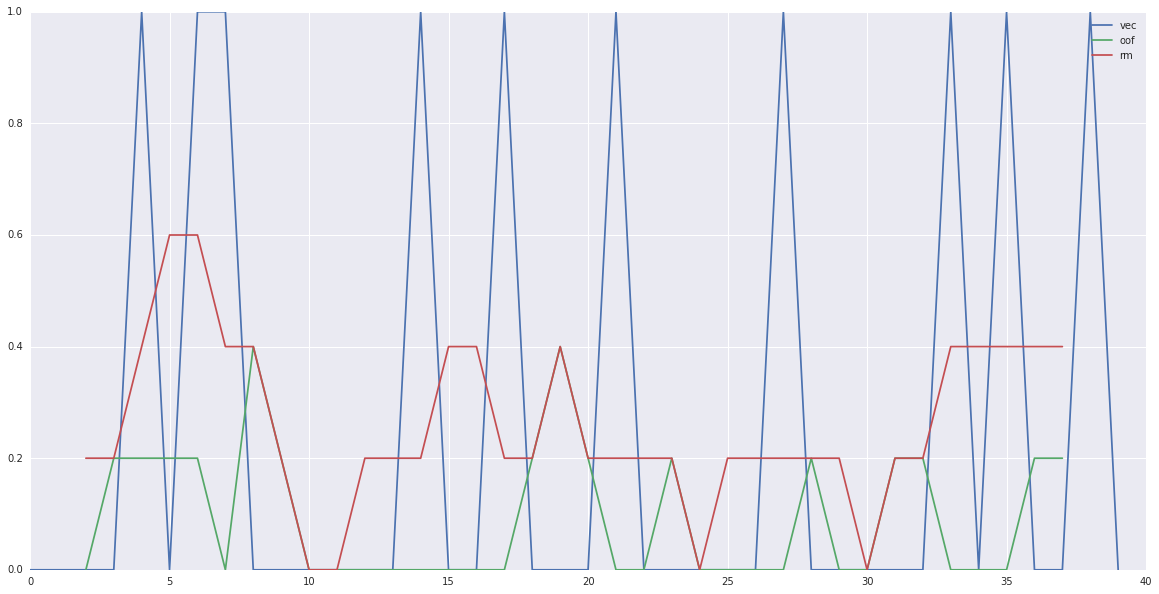

In [178]:
plt.figure(figsize=(20,10))
plt.plot(vec, label='vec')
plt.plot(result, label='oof')
plt.plot(rm, label='rm')
plt.legend()
plt.show()